# Project: Wrangling and Analyze Data

## Table of Content



<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#access">Accessing Data</a></li>
    <ul>
        <li><a href="#visualaccess">Visual Assessment</a></li>
        <li><a href="#progaccess">Programmatic Assessment</a></li>
        <li><a href="#quality">Quality Issues</a></li>
        <li><a href="#tidy">Tidiness Issues</a></li>
    </ul>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#analyze">Analyzing and Visualizing Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="intro"></a>
## Introduction

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. This project will majorly demonstrate my data wrangling skills (Gathering, Accessing, Cleaning, Documenting, and Storing).

I'll start this project by importing the required libraries then gathering data by 
1. Reading the already provided `twitter-archive-enhanced` data set provided by Udacity.
2. Programmatically downloading the image prediction data from a Udacity hosted webpage.
3. Quering data from Twitter using the Twitter API and tweepy Python library.

Next, I'll visually and programmatically assess the data sets and document the quality and tidiness issues.

After that, I'll clean the data using the Python's NumPy and pandas libraries to clean the data.

Then, combine the three clean data sets and store in a csv file.

From there, I'll generate insights and develop visualizations to communicate these insights.

Let's get started!

<a id="gather"></a>
## Data Gathering


In [93]:
# Importing all the required libraries for this project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import tweepy

In [2]:
# Importing the twitter_archive_enhanced.csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Using the Requests library to download the tweet image prediction (image_predictions.tsv)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)

Next, I'll be fetching the required data from Twitter using the tweepy module and twitter API

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

The next cell is somewhat long. You can skip to the following cell <a href="#skip">here</a>.

In [6]:
# For loop which will add each available tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    start = timer()
    count = 0
    fails_dict = {}
    for tweet_id in twitter_archive['tweet_id']:
        count += 1
        print(f"{count}:{tweet_id}")
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, f)
            f.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
    end = timer()
    print(f"Finished in {end - start} seconds")
    print(f"{len(fails_dict)} out of {len(twitter_archive.tweet_id)} Failed")
    print(fails_dict)

1:892420643555336193
Success
2:892177421306343426
Success
3:891815181378084864
Success
4:891689557279858688
Success
5:891327558926688256
Success
6:891087950875897856
Success
7:890971913173991426
Success
8:890729181411237888
Success
9:890609185150312448
Success
10:890240255349198849
Success
11:890006608113172480
Success
12:889880896479866881
Success
13:889665388333682689
Success
14:889638837579907072
Success
15:889531135344209921
Success
16:889278841981685760
Success
17:888917238123831296
Success
18:888804989199671297
Success
19:888554962724278272
Success
20:888202515573088257
Fail
21:888078434458587136
Success
22:887705289381826560
Success
23:887517139158093824
Success
24:887473957103951883
Success
25:887343217045368832
Success
26:887101392804085760
Success
27:886983233522544640
Success
28:886736880519319552
Success
29:886680336477933568
Success
30:886366144734445568
Success
31:886267009285017600
Success
32:886258384151887873
Success
33:886054160059072513
Success
34:885984800019947520


Success
271:841314665196081154
Success
272:841077006473256960
Success
273:840761248237133825
Success
274:840728873075638272
Success
275:840698636975636481
Success
276:840696689258311684
Success
277:840632337062862849
Success
278:840370681858686976
Success
279:840268004936019968
Success
280:839990271299457024
Success
281:839549326359670784
Success
282:839290600511926273
Success
283:839239871831150596
Success
284:838952994649550848
Success
285:838921590096166913
Success
286:838916489579200512
Success
287:838831947270979586
Success
288:838561493054533637
Success
289:838476387338051585
Success
290:838201503651401729
Success
291:838150277551247360
Success
292:838085839343206401
Success
293:838083903487373313
Success
294:837820167694528512
Success
295:837482249356513284
Success
296:837471256429613056
Success
297:837366284874571778
Fail
298:837110210464448512
Success
299:837012587749474308
Fail
300:836989968035819520
Success
301:836753516572119041
Success
302:836677758902222849
Success
303:83

Success
536:807059379405148160
Success
537:807010152071229440
Success
538:806629075125202948
Success
539:806620845233815552
Success
540:806576416489959424
Success
541:806542213899489280
Success
542:806242860592926720
Success
543:806219024703037440
Success
544:805958939288408065
Success
545:805932879469572096
Success
546:805826884734976000
Success
547:805823200554876929
Success
548:805520635690676224
Success
549:805487436403003392
Success
550:805207613751304193
Success
551:804738756058218496
Success
552:804475857670639616
Success
553:804413760345620481
Success
554:804026241225523202
Success
555:803773340896923648
Success
556:803692223237865472
Success
557:803638050916102144
Success
558:803380650405482500
Success
559:803321560782307329
Success
560:803276597545603072
Success
561:802952499103731712
Success
562:802624713319034886
Success
563:802600418706604034
Success
564:802572683846291456
Success
565:802323869084381190
Success
566:802265048156610565
Success
567:802247111496568832
Fail
568

Success
801:772615324260794368
Success
802:772581559778025472
Success
803:772193107915964416
Success
804:772152991789019136
Success
805:772117678702071809
Success
806:772114945936949249
Success
807:772102971039580160
Success
808:771908950375665664
Success
809:771770456517009408
Success
810:771500966810099713
Success
811:771380798096281600
Success
812:771171053431250945
Success
813:771136648247640064
Success
814:771102124360998913
Success
815:771014301343748096
Success
816:771004394259247104
Fail
817:770787852854652928
Success
818:770772759874076672
Success
819:770743923962707968
Fail
820:770655142660169732
Success
821:770414278348247044
Success
822:770293558247038976
Success
823:770093767776997377
Success
824:770069151037685760
Success
825:769940425801170949
Success
826:769695466921623552
Success
827:769335591808995329
Success
828:769212283578875904
Success
829:768970937022709760
Success
830:768909767477751808
Success
831:768855141948723200
Success
832:768609597686943744
Success
833:76

Rate limit reached. Sleeping for: 195


Success
902:758474966123810816
Success
903:758467244762497024
Success
904:758405701903519748
Success
905:758355060040593408
Success
906:758099635764359168
Success
907:758041019896193024
Success
908:757741869644341248
Success
909:757729163776290825
Success
910:757725642876129280
Success
911:757611664640446465
Success
912:757597904299253760
Success
913:757596066325864448
Success
914:757400162377592832
Success
915:757393109802180609
Success
916:757354760399941633
Success
917:756998049151549440
Success
918:756939218950160384
Success
919:756651752796094464
Success
920:756526248105566208
Success
921:756303284449767430
Success
922:756288534030475264
Success
923:756275833623502848
Success
924:755955933503782912
Success
925:755206590534418437
Success
926:755110668769038337
Success
927:754874841593970688
Success
928:754856583969079297
Success
929:754747087846248448
Success
930:754482103782404096
Success
931:754449512966619136
Success
932:754120377874386944
Success
933:754011816964026368
Fail
934

Success
1162:723912936180330496
Success
1163:723688335806480385
Success
1164:723673163800948736
Success
1165:723179728551723008
Success
1166:722974582966214656
Success
1167:722613351520608256
Success
1168:721503162398597120
Success
1169:721001180231503872
Success
1170:720785406564900865
Success
1171:720775346191278080
Success
1172:720415127506415616
Success
1173:720389942216527872
Success
1174:720340705894408192
Success
1175:720059472081784833
Success
1176:720043174954147842
Success
1177:719991154352222208
Success
1178:719704490224398336
Success
1179:719551379208073216
Success
1180:719367763014393856
Success
1181:719339463458033665
Success
1182:719332531645071360
Success
1183:718971898235854848
Success
1184:718939241951195136
Success
1185:718631497683582976
Success
1186:718613305783398402
Success
1187:718540630683709445
Success
1188:718460005985447936
Success
1189:718454725339934721
Success
1190:718246886998687744
Success
1191:718234618122661888
Success
1192:717841801130979328
Success


Success
1419:698355670425473025
Success
1420:698342080612007937
Success
1421:698262614669991936
Success
1422:698195409219559425
Success
1423:698178924120031232
Success
1424:697995514407682048
Success
1425:697990423684476929
Success
1426:697943111201378304
Success
1427:697881462549430272
Success
1428:697630435728322560
Success
1429:697616773278015490
Success
1430:697596423848730625
Success
1431:697575480820686848
Success
1432:697516214579523584
Success
1433:697482927769255936
Success
1434:697463031882764288
Success
1435:697270446429966336
Success
1436:697259378236399616
Success
1437:697255105972801536
Success
1438:697242256848379904
Success
1439:696900204696625153
Success
1440:696894894812565505
Success
1441:696886256886657024
Success
1442:696877980375769088
Success
1443:696754882863349760
Success
1444:696744641916489729
Success
1445:696713835009417216
Success
1446:696518437233913856
Success
1447:696490539101908992
Success
1448:696488710901260288
Success
1449:696405997980676096
Success


Success
1676:682242692827447297
Success
1677:682088079302213632
Success
1678:682059653698686977
Success
1679:682047327939461121
Success
1680:682032003584274432
Success
1681:682003177596559360
Success
1682:681981167097122816
Success
1683:681891461017812993
Success
1684:681694085539872773
Success
1685:681679526984871937
Success
1686:681654059175129088
Success
1687:681610798867845120
Success
1688:681579835668455424
Success
1689:681523177663676416
Success
1690:681340665377193984
Success
1691:681339448655802368
Success
1692:681320187870711809
Success
1693:681302363064414209
Success
1694:681297372102656000
Success
1695:681281657291280384
Success
1696:681261549936340994
Success
1697:681242418453299201
Success
1698:681231109724700672
Success
1699:681193455364796417
Success
1700:680970795137544192
Success
1701:680959110691590145
Success
1702:680940246314430465
Success
1703:680934982542561280
Success
1704:680913438424612864
Success
1705:680889648562991104
Success
1706:680836378243002368
Success


Rate limit reached. Sleeping for: 161


Success
1803:676949632774234114
Success
1804:676948236477857792
Success
1805:676946864479084545
Success
1806:676942428000112642
Success
1807:676936541936185344
Success
1808:676916996760600576
Success
1809:676897532954456065
Success
1810:676864501615042560
Success
1811:676821958043033607
Success
1812:676819651066732545
Success
1813:676811746707918848
Success
1814:676776431406465024
Success
1815:676617503762681856
Success
1816:676613908052996102
Success
1817:676606785097199616
Success
1818:676603393314578432
Success
1819:676593408224403456
Success
1820:676590572941893632
Success
1821:676588346097852417
Success
1822:676582956622721024
Success
1823:676575501977128964
Success
1824:676533798876651520
Success
1825:676496375194980353
Success
1826:676470639084101634
Success
1827:676440007570247681
Success
1828:676430933382295552
Success
1829:676263575653122048
Success
1830:676237365392908289
Success
1831:676219687039057920
Success
1832:676215927814406144
Success
1833:676191832485810177
Success


Success
2060:671186162933985280
Success
2061:671182547775299584
Success
2062:671166507850801152
Success
2063:671163268581498880
Success
2064:671159727754231808
Success
2065:671154572044468225
Success
2066:671151324042559489
Success
2067:671147085991960577
Success
2068:671141549288370177
Success
2069:671138694582165504
Success
2070:671134062904504320
Success
2071:671122204919246848
Success
2072:671115716440031232
Success
2073:671109016219725825
Success
2074:670995969505435648
Success
2075:670842764863651840
Success
2076:670840546554966016
Success
2077:670838202509447168
Success
2078:670833812859932673
Success
2079:670832455012716544
Success
2080:670826280409919488
Success
2081:670823764196741120
Success
2082:670822709593571328
Success
2083:670815497391357952
Success
2084:670811965569282048
Success
2085:670807719151067136
Success
2086:670804601705242624
Success
2087:670803562457407488
Success
2088:670797304698376195
Success
2089:670792680469889025
Success
2090:670789397210615808
Success


Success
2317:666649482315059201
Success
2318:666644823164719104
Success
2319:666454714377183233
Success
2320:666447344410484738
Success
2321:666437273139982337
Success
2322:666435652385423360
Success
2323:666430724426358785
Success
2324:666428276349472768
Success
2325:666421158376562688
Success
2326:666418789513326592
Success
2327:666411507551481857
Success
2328:666407126856765440
Success
2329:666396247373291520
Success
2330:666373753744588802
Success
2331:666362758909284353
Success
2332:666353288456101888
Success
2333:666345417576210432
Success
2334:666337882303524864
Success
2335:666293911632134144
Success
2336:666287406224695296
Success
2337:666273097616637952
Success
2338:666268910803644416
Success
2339:666104133288665088
Success
2340:666102155909144576
Success
2341:666099513787052032
Success
2342:666094000022159362
Success
2343:666082916733198337
Success
2344:666073100786774016
Success
2345:666071193221509120
Success
2346:666063827256086533
Success
2347:666058600524156928
Success


<a id="skip"></a>
From the result above, 30 out the requests failed.

The major reason these requests failed is because the API couldn't find those IDs. The other reasons was connection issues and the API forbidding the request.

Now, I'll be extracting the required data from the txt file.

In [5]:
# Fetching data from the txt file saved from the api
tweet_json = []
with open('tweet_json.txt', 'r') as file:
    content = file.readlines()
    for i in range(len(content)):
        tweet = []
        tweet.append(json.loads(content[i])['id'])
        tweet.append(json.loads(content[i])['retweet_count'])
        tweet.append(json.loads(content[i])['favorite_count'])
        tweet_json.append(tweet)

In [6]:
# Declaring the headers and creating a dataframe for tweet_json
headers = ['tweet_id', 'retweet_count', 'favorite_count']
tweet_json = pd.DataFrame(tweet_json, columns = headers)

In [7]:
# Reading the third dataset
image_predictions = pd.read_csv('image_predictions.tsv', delimiter='\t')

<a id="access"></a>
# Assessing Data
In this section, I'l be accessing the datasets visually and programmatically and also listing them out.

<a id="visualaccess"></a>
### Visual Assessment

I opened the data sets and visually accessed for data issues that can easily be spotted.

<a id="progaccess"></a>
### Programatic Assessment

Here, I'll programmatically assess the 3 dataframe with pandas and NumPy.

### twitter_archive dataframe

In [8]:
# Getting the columns of the dataframe to have a general look at the dataframe
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [9]:
# using the `info` method to programmatically access the dataset 
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Checking out the first 5 rows of the dataframe
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# Checking out the summary statistics of the dataframe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# Checking out the data types and noting errant datatypes
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [13]:
# Checking out the number of unique values for each column
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [14]:
# Checking out the value counts for the name column
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Pherb          1
Clyde          1
Sonny          1
Sully          1
Stephanus      1
Name: name, Length: 957, dtype: int64

In [15]:
# Checking for the rows that have rating_numerator as 0
twitter_archive[twitter_archive['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [16]:
# Checking for the rows that have rating_numerator less than 10
twitter_archive[twitter_archive['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [17]:
# Checking for the rows that have rating_denominator as 0
twitter_archive[twitter_archive['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [18]:
# Checking for the rows that have rating_denominator greater than 10
twitter_archive[twitter_archive['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [19]:
# Checking for duplicate data
twitter_archive.duplicated().sum()

0

In [20]:
# Accessing the retweets
twitter_archive[twitter_archive['retweeted_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [21]:
# Checking for the value counts of the "name" column
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Pherb          1
Clyde          1
Sonny          1
Sully          1
Stephanus      1
Name: name, Length: 957, dtype: int64

`name` column isn't required for this analysis since there are too many "None" values and unique values

#### `image_prediction` dataframe

Now, for the `image_prediction` dataframe

In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1248,747816857231626240,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True
802,691459709405118465,https://pbs.twimg.com/media/CZiO7mWUEAAa4zo.jpg,1,Shetland_sheepdog,0.551206,True,collie,0.232544,True,Border_collie,0.095218,True
1373,762471784394268675,https://pbs.twimg.com/ext_tw_video_thumb/76247...,1,Samoyed,0.540276,True,standard_poodle,0.279802,True,toy_poodle,0.102058,True
576,678675843183484930,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,1,maze,0.339850,False,streetcar,0.099688,False,sundial,0.084808,False
1460,778039087836069888,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,2,German_shepherd,0.717776,True,malinois,0.111175,True,Norwegian_elkhound,0.058802,True
1543,791406955684368384,https://pbs.twimg.com/media/CvukbEkWAAAV-69.jpg,4,Pembroke,0.972629,True,Cardigan,0.027026,True,basenji,0.000153,True
682,683834909291606017,https://pbs.twimg.com/ext_tw_video_thumb/68383...,1,Maltese_dog,0.738449,True,toy_poodle,0.102992,True,Samoyed,0.023247,True
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,candle,0.174315,False,lampshade,0.120407,False,plunger,0.072099,False
1536,790581949425475584,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,2,refrigerator,0.998886,False,malinois,0.000153,True,kelpie,0.000131,True
370,672975131468300288,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,pug,0.836421,True,Brabancon_griffon,0.044668,True,French_bulldog,0.036570,True


In [25]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
# Checking for the number of rows that has a p1_conf value of 1
image_predictions[image_predictions['p1_conf'] == 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


Hmmmmm. Only one

In [27]:
# Checking the data types to make sure there are not errant data types
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### tweet_json dataframe

Now, the `tweet_json` dataframe

In [28]:
# Checking out the dataframe
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6979,33728
1,892177421306343426,5280,29255
2,891815181378084864,3466,21987
3,891689557279858688,7198,36823
4,891327558926688256,7723,35207


In [29]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
tweet_id          2326 non-null int64
retweet_count     2326 non-null int64
favorite_count    2326 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [30]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.418114e+17,2462.074807,7035.619948
std,6.821686e+16,4169.220810,10931.617186
min,6.660209e+17,1.000000,0.000000
25%,6.780814e+17,492.250000,1219.500000
50%,7.180382e+17,1147.500000,3043.500000
75%,7.986600e+17,2848.500000,8580.250000
max,8.924206e+17,70427.000000,144401.000000


In [31]:
# Checking out the data types to make sure there are not errant data types
tweet_json.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

<a id="quality"></a>
### Quality issues

#### twitter_archive (TA1) dataframe
1. `tweet_id` should be an object since no arithemetical operations will be performed on them.

2. timestamp's datatype should be "datetime"

3. Rows that have `rating_numerator` as 0

4. Missing data for the `expanded_url` column

5. Rows that have `retweeted_status_id` should be removed

6. Some data cells have "None" placeholder instead of the convential "NaN" to represent that there's no data available for that cell

7. `retweeted_status_timestamp`, `retweeted_status_id`, and `retweeted_status_user_id` column should also be dropped since we don't need the retweets

8. Actual sources should be extracted from the `source` column

9. The `name` column with `a` and `an` values should replaced with nan

#### image_predictions (IP1) dataframe
1. The data type of the `tweet_id`, `img_num` columns should be object
2. There should be a column that states the breed the neural network determined

#### tweet_json (TJ1) dataframe
1. The datatype of `tweet_id` should be object

<a id="tidy"></a>
### Tidiness issues
#### twitter_archive (TA2) dataframe
1. Dog stage (doggo, floofer, pupper, puppo) should be in one column. After further investigations, [other quality issues](#doggo) were found from this issue.

2. There should be a column that states the calculated rating instead of 2 columns having the numerator and denominator

#### image_predictions (IP2) dataframe
1. Data in this dataframe is supposed to be merged with `twitter_archive` so that it can each observation forms a row and each type of observational unit forms a table.

#### tweet_json (TJ2) dataframe
1. Data in this dataframe is supposed to be merged with `twitter_archive` so that it can each observation forms a row and each type of observational unit forms a table.

<a id="clean"></a>
## Cleaning Data
In this section, I'll be cleaning all the issues I documented under the Accessing Data heading

In [32]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue TA1.5 : Rows that have retweeted_status_id should be removed

#### Define

Using the `drop` method, I'll be dropping the rows that have a value for the `retweeted_status_id` since we only need the original posts

#### Code

In [33]:
# Dropping the rows that have values for the retweeted_status_id
twitter_archive_clean.drop(twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull()].index, inplace = True)

#### Test

In [34]:
# Checking if any data row that has a value for the `retweeted_status_id` column 
twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Great. The retweets have successfulled been cleaned

### Issue TA1.7 : `retweeted_status_timestamp`, `retweeted_status_id`, and `retweeted_status_user_id` column should also be dropped since we don't need the retweets

#### Define

Using the panda's `drop` method to drop the column

#### Code

In [35]:
# Now, dropping the columns
twitter_archive_clean.drop(['retweeted_status_timestamp', 'retweeted_status_id', 'retweeted_status_user_id'], axis=1, inplace=True)

#### Test

In [36]:
# Checking if the column is still in the dataframe
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue TA2.1 : Dog stage (doggo, floofer, pupper, puppo) should be in one column

#### Define

I'll create a column for stage and add the dog stage columns (doggo, floffer, pupper, puppo) then remove None.

#### Code

In [37]:
twitter_archive_clean['stage'] = None 
# Adding all the values from the four columns together, and then drop the "None" after that.
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [38]:
# Removing all None values
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].map(lambda x: x.replace("None",""))

Now, there's one more issue. The rows that have two dog stages.

In [39]:
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [40]:
# Replacing the empty spaces with nan
twitter_archive_clean.stage = twitter_archive_clean.stage.replace('', np.nan)

#### Test

In [41]:
twitter_archive_clean['stage'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

After further investigation, I found that the doggo, puppo combination is supposed to be just puppo.

#### Code

In [42]:
twitter_archive_clean.stage = twitter_archive_clean.stage.replace('doggo, puppo', 'puppo')

#### Test

In [43]:
twitter_archive_clean['stage'].value_counts()

pupper            224
doggo              75
puppo              25
doggo, pupper      10
floofer             9
doggo, floofer      1
Name: stage, dtype: int64

Great. Puppo's value count has increased by 1.

<a id='doggo'></a>
#### Define

Upon further investigation, 
1. It is found that the tweet with ID "817777686764523521" is a [doggo](https://www.instagram.com/didodoggo/?hl=en).
2. The tweet_id 785639753186217984 is not a dog but was classified as a doggo and pupper so I'll be dropping the row.
3. The tweet_id 751583847268179968 is a doggo not doggo and pupper.
4. The tweet_id 854010172552949760 is a floofer not doggo and floofer.

#### Code

In [44]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']  == 817777686764523521, 'stage'] = 'doggo'

#### Test

In [45]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']  == 817777686764523521, 'stage']

460    doggo
Name: stage, dtype: object

In [46]:
twitter_archive_clean['stage'].value_counts()

pupper            224
doggo              76
puppo              25
doggo, pupper       9
floofer             9
doggo, floofer      1
Name: stage, dtype: int64

#### Code

In [47]:
# Getting the index for the id that'll be dropped as it is not a dog
index_names = twitter_archive_clean[twitter_archive_clean['tweet_id'] == 785639753186217984].index
twitter_archive_clean.drop(index_names, inplace = True)

#### Test

In [48]:
twitter_archive_clean[twitter_archive_clean['tweet_id'] == 785639753186217984]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage


In [49]:
twitter_archive_clean['stage'].value_counts()

pupper            224
doggo              76
puppo              25
floofer             9
doggo, pupper       8
doggo, floofer      1
Name: stage, dtype: int64

#### Code

In [50]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']  == 751583847268179968, 'stage'] = 'doggo'

#### Test

In [51]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']  == 751583847268179968, 'stage']

956    doggo
Name: stage, dtype: object

In [52]:
twitter_archive_clean['stage'].value_counts()

pupper            224
doggo              77
puppo              25
floofer             9
doggo, pupper       7
doggo, floofer      1
Name: stage, dtype: int64

#### Code

In [53]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']  == 854010172552949760, 'stage'] = 'floofer'

#### Test

In [54]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']  == 854010172552949760, 'stage']

200    floofer
Name: stage, dtype: object

In [55]:
twitter_archive_clean['stage'].value_counts()

pupper           224
doggo             77
puppo             25
floofer           10
doggo, pupper      7
Name: stage, dtype: int64

### Issue TA1.8 : Actual sources should be extracted from the source column

#### Define

Here we can do a simple find and replace with the `replace` function

In [56]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2041
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Code

In [57]:
# Replacing all the full links with the anchor texts for better analysis
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

#### Test

In [58]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue TA1.4 : Missing data for the "expanded_urls" column

#### Define

Here, we can just drop the rows that don't have NaN values for the `expanded_urls` column

In [59]:
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,Twitter for iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,None,None,None,None,None,NaN
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,None,None,None,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,Twitter for iPhone,@RealKentMurphy 14/10 confirmed,NaN,14,10,None,None,None,None,None,NaN
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,Twitter for iPhone,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10,None,None,None,None,None,NaN
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,Twitter for iPhone,@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,10,None,None,None,None,None,NaN
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,Twitter for iPhone,@Marc_IRL pixelated af 12/10,NaN,12,10,None,None,None,None,None,NaN
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,Twitter for iPhone,@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,10,None,None,None,None,None,NaN
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,None,None,None,None,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,Twitter for iPhone,@s8n You tried very hard to portray this good ...,NaN,666,10,None,None,None,None,None,NaN
218,850333567704068097,8.503288e+17,2.195506e+07,2017-04-07 13:04:55 +0000,Twitter for iPhone,@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,13,10,None,None,None,None,None,NaN


#### Code

In [60]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['expanded_urls'].isna()].index, inplace=True)

#### Test

In [61]:
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage


### Issue TA1.2 : timestamp's datatype should be "datetime"

#### Define

The column can be converted to the datetime datatype with the `to_datetime` method

#### Code

In [62]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'].str[:-6])

#### Test

In [63]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2116 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2116 non-null datetime64[ns]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null int64
rating_denominator       2116 non-null int64
name                     2116 non-null object
doggo                    2116 non-null object
floofer                  2116 non-null object
pupper                   2116 non-null object
puppo                    2116 non-null object
stage                    337 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 264.5+ KB


### Issue TA1.3 : Rows that have rating_numerator as 0

#### Define

Here, we'll have to drop some rows that have these errors

In [64]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None,NaN
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None,NaN


#### Code

In [65]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 0].index, axis=0, inplace=True)

#### Test

In [66]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage


### Issue IP1.2 : There should be a column that states the breed the neural network determined

#### Define

First, I'll create a new column of NaN values and then create a control flow to input the most likely breed in the required cells

#### Code

In [67]:
image_predictions_clean['most_likely_breed'] = np.nan

In [68]:
for i in range(len(image_predictions_clean)):
    if image_predictions_clean['p1_dog'][i] == True:
        image_predictions_clean['most_likely_breed'][i] = image_predictions_clean['p1'][i]
    elif image_predictions_clean['p2_dog'][i] == True:
        image_predictions_clean['most_likely_breed'][i] = image_predictions_clean['p2'][i]
    elif image_predictions_clean['p3_dog'][i] == True:
        image_predictions_clean['most_likely_breed'][i] = image_predictions_clean['p3'][i]

C:\Users\HP_ELITE\anaconda3\envs\data_analysis_1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP_ELITE\anaconda3\envs\data_analysis_1\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\HP_ELITE\anaconda3\envs\data_analysis_1\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

#### Test

In [69]:
image_predictions_clean.sample(16)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,most_likely_breed
475,675149409102012420,https://pbs.twimg.com/media/CV6czeEWEAEdChp.jpg,1,chow,0.999876,True,Tibetan_mastiff,0.000059,True,Tibetan_terrier,0.000029,True,chow
1687,814986499976527872,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,1,dalmatian,0.999828,True,boxer,0.000068,True,American_Staffordshire_terrier,0.000034,True,dalmatian
1914,854120357044912130,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,4,black-and-tan_coonhound,0.854861,True,Doberman,0.050792,True,bluetick,0.021762,True,black-and-tan_coonhound
258,670780561024270336,https://pbs.twimg.com/media/CU8XW2dWwAA-Lmc.jpg,1,Labrador_retriever,0.244889,True,American_black_bear,0.056994,False,brown_bear,0.053993,False,Labrador_retriever
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever
895,699446877801091073,https://pbs.twimg.com/media/CbTvNpoW0AEemnx.jpg,3,Pembroke,0.969400,True,Cardigan,0.026059,True,Chihuahua,0.003505,True,Pembroke
122,668221241640230912,https://pbs.twimg.com/media/CUX_rAyWsAYZOQ5.jpg,1,chow,0.395101,True,golden_retriever,0.372115,True,Labrador_retriever,0.148785,True,chow
1231,745789745784041472,https://pbs.twimg.com/media/ClmT0KHWkAAXbhy.jpg,1,Pekinese,0.984267,True,Shih-Tzu,0.008942,True,cocker_spaniel,0.001928,True,Pekinese
1694,816091915477250048,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,3,Pomeranian,0.967345,True,Samoyed,0.007397,True,papillon,0.006017,True,Pomeranian
626,680801747103793152,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,1,pug,0.996720,True,Labrador_retriever,0.001439,True,Staffordshire_bullterrier,0.000518,True,pug


### Issue TA2.2 : There should be a column that states the calculated rating instead of 2 columns having the numerator and denominator

#### Define

This can be done with a mathematical operation

#### Code

In [70]:
twitter_archive_clean['calculated_rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

#### Test

In [71]:
twitter_archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,calculated_rating
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32,Twitter for iPhone,Ugh not again. We only rate dogs. Please don't...,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None,NaN,1.2
2057,671355857343524864,NaN,NaN,2015-11-30 15:51:24,Twitter for iPhone,This is Lou. He's a Petrarch Sunni Pinto. Well...,https://twitter.com/dog_rates/status/671355857...,10,10,Lou,None,None,None,None,NaN,1.0
1391,700143752053182464,NaN,NaN,2016-02-18 02:24:13,Twitter for iPhone,When it's Janet from accounting's birthday but...,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None,pupper,1.0
328,833722901757046785,NaN,NaN,2017-02-20 17:00:04,Twitter for iPhone,This is Bronte. She's fairly h*ckin aerodynami...,https://twitter.com/dog_rates/status/833722901...,13,10,Bronte,None,None,None,None,NaN,1.3
2258,667724302356258817,NaN,NaN,2015-11-20 15:20:54,Twitter Web Client,What a dog to start the day with. Very calm. L...,https://twitter.com/dog_rates/status/667724302...,7,10,None,None,None,None,None,NaN,0.7
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11,Twitter for iPhone,This is Gary. He couldn't miss this puppertuni...,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None,NaN,1.3
2103,670676092097810432,NaN,NaN,2015-11-28 18:50:15,Twitter for iPhone,This is Bloo. He's a Westminster Cîroc. Doesn'...,https://twitter.com/dog_rates/status/670676092...,8,10,Bloo,None,None,None,None,NaN,0.8
1982,672968025906282496,NaN,NaN,2015-12-05 02:37:35,Twitter for iPhone,This is Gustaf. He's a purebred Chevy Equinox....,https://twitter.com/dog_rates/status/672968025...,11,10,Gustaf,None,None,None,None,NaN,1.1
1393,700029284593901568,NaN,NaN,2016-02-17 18:49:22,Twitter for iPhone,This is Coops. His ship is taking on water. So...,https://twitter.com/dog_rates/status/700029284...,10,10,Coops,None,None,None,None,NaN,1.0
1128,729823566028484608,NaN,NaN,2016-05-10 00:01:12,Twitter for iPhone,This is Stefan. He's a downright remarkable pu...,https://twitter.com/dog_rates/status/729823566...,13,10,Stefan,None,None,None,None,NaN,1.3


### Issue TA1.9: The name column with a and an values should replaced with nan

#### Define

Here, I'll replace all the `a` and `an` name values with nan as both names don't describe the data accurately.

#### Code

In [72]:
# Creating a list then a for loop to change all the values to nan
wrong_name_list = list(twitter_archive_clean.query('name == "a" or name == "an"').index)
for i in wrong_name_list:     
    twitter_archive_clean.name[i] = np.nan

C:\Users\HP_ELITE\anaconda3\envs\data_analysis_1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Test

In [73]:
twitter_archive_clean.name.value_counts()

None         620
Charlie       11
Lucy          11
Cooper        10
Oliver        10
            ... 
Schnitzel      1
Berkeley       1
Lucia          1
Furzey         1
Stephanus      1
Name: name, Length: 953, dtype: int64

### Issue IP2.1 & TJ2.1 : Merging Operations to Create a Master Dataframe

#### Define

Here, I'll be merging all the datasets to create a master dataframe

In [74]:
tweet_json_clean.shape

(2326, 3)

#### Code

In [75]:
twitter_archive_clean.replace("None", np.NaN, inplace=True)

In [111]:
master_df = pd.merge(twitter_archive_clean, image_predictions_clean[['tweet_id', 'most_likely_breed']], how="inner", on='tweet_id')

In [112]:
master_df = pd.merge(master_df, tweet_json_clean, how="inner", on='tweet_id')

#### Test

In [78]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,calculated_rating,most_likely_breed,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,1.3,NaN,6979,33728
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,1.3,Chihuahua,5280,29255
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN,1.2,Chihuahua,3466,21987
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN,1.3,Labrador_retriever,7198,36823
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN,1.2,basset,7723,35207


In [79]:
master_df.shape

(1982, 19)

### Issue TA1.6 : Some data cells have "None" placeholder instead of the convential "NaN" to represent that there's no data available for that cell

#### Define

This can be done with a `replace` method and the `np.NaN`

#### Code

In [113]:
master_df.replace('None', np.NaN, inplace = True)

#### Test

In [81]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,calculated_rating,most_likely_breed,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,1.3,NaN,6979,33728
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,1.3,Chihuahua,5280,29255
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN,1.2,Chihuahua,3466,21987
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN,1.3,Labrador_retriever,7198,36823
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN,1.2,basset,7723,35207


In [82]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 1981
Data columns (total 19 columns):
tweet_id                 1982 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1982 non-null datetime64[ns]
source                   1982 non-null object
text                     1982 non-null object
expanded_urls            1982 non-null object
rating_numerator         1982 non-null int64
rating_denominator       1982 non-null int64
name                     1378 non-null object
doggo                    72 non-null object
floofer                  8 non-null object
pupper                   211 non-null object
puppo                    23 non-null object
stage                    304 non-null object
calculated_rating        1982 non-null float64
most_likely_breed        1676 non-null object
retweet_count            1982 non-null int64
favorite_count           1982 non-null int64
dtypes: datetime64[ns](1),

### Issue TA1.1, IP1.1 & TJ1.1 : Changing the `tweet_id` and other id columns to objects

#### Define

I'll be converting the datatype using the `astype` method

#### Code

In [193]:
id_list = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']
for i in id_list:
    master_df[i] = master_df[i].astype(str)

#### Test

In [194]:
master_df.dtypes

tweet_id                         object
in_reply_to_status_id            object
in_reply_to_user_id              object
timestamp                datetime64[ns]
source                           object
text                             object
expanded_urls                    object
rating_numerator                  int64
rating_denominator                int64
name                             object
doggo                            object
floofer                          object
pupper                           object
puppo                            object
stage                            object
calculated_rating               float64
most_likely_breed                object
retweet_count                     int64
favorite_count                    int64
dtype: object

In [188]:
master_df[~ master_df.in_reply_to_status_id.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,calculated_rating,most_likely_breed,retweet_count,favorite_count
118,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53,Twitter for iPhone,Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14,10,NaN,NaN,NaN,NaN,NaN,NaN,1.4,Lakeland_terrier,950,7881
145,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52,Twitter for iPhone,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14,10,NaN,NaN,NaN,NaN,NaN,NaN,1.4,Old_English_sheepdog,1651,10799
191,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57,Twitter for iPhone,PUPDATE: I'm proud to announce that Toby is 23...,https://twitter.com/dog_rates/status/844979544...,13,10,NaN,NaN,NaN,NaN,NaN,NaN,1.3,Shetland_sheepdog,2306,12655
414,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,NaN,pupper,NaN,"doggo, pupper",1.1,Labrador_retriever,1289,6609
748,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37,Twitter for iPhone,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,https://twitter.com/dog_rates/status/746818907...,13,10,NaN,NaN,NaN,NaN,NaN,NaN,1.3,Ibizan_hound,1591,4941
845,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58,Twitter for iPhone,"""Challenge completed"" \n(pupgraded to 12/10) h...",https://twitter.com/dog_rates/status/729838605...,12,10,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,338,1602
1025,705786532653883392,7.032559e+17,4.196984e+09,2016-03-04 16:06:36,Twitter for iPhone,"Seriously, add us 🐶 11/10 for sad wet pupper h...",https://twitter.com/dog_rates/status/705786532...,11,10,NaN,NaN,NaN,pupper,NaN,pupper,1.1,Labrador_retriever,466,1792
1034,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25,Twitter for iPhone,I found a forest Pipsy. 12/10 https://t.co/mIQ...,https://twitter.com/dog_rates/status/704871453...,12,10,NaN,NaN,NaN,NaN,NaN,NaN,1.2,Norfolk_terrier,1014,3958
1049,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44,Twitter for iPhone,Really guys? Again? I know this is a rare Alba...,https://twitter.com/dog_rates/status/703425003...,9,10,NaN,NaN,NaN,NaN,NaN,NaN,0.9,miniature_pinscher,1220,3498
1134,695767669421768709,6.753494e+17,4.196984e+09,2016-02-06 00:35:13,Twitter for iPhone,If you are aware of who is making these please...,https://twitter.com/dog_rates/status/695767669...,13,10,NaN,NaN,NaN,NaN,NaN,NaN,1.3,soft-coated_wheaten_terrier,665,1709


<a id="store"></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [86]:
master_df.to_csv('twitter_master.csv', index=False)

<a id="analyze"></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. 

### Insights:
1. Most Used Tweet Sources

2. Top Dog Breeds Featured by WeRateDogs

3. Distribution of calculated rating

4. Distribution of favorite count

5. Distribution of retweet count

6. Favorite count over time

7. Retweet count over time

8. Relationship between retweet count and favorite count

### Functions to Make Visualizations Faster

In [134]:
# Function to generate bar chart
def create_bar_chart(orientation = 'x', variable=None, variable_name=None, order=None, descending=False, rotate_labels=False):
    """Function to create a bar chart by simply inputing the variable, variable_name, and order"""
    base_color = sb.color_palette()[0]
    
    # so that the function can access the dataframe
    global master_df
    
    # Ordering 
    if descending == True:
        master_df = master_df.sort_values(variable, ascending=False)
    
    # Orientation for x
    if orientation == 'x':
        sb.countplot(data=master_df, x=variable, color=base_color, order=order)
        plt.xlabel(variable_name)
        plt.ylabel('Count')
        # get the current tick locations and labels
        locs, labels = plt.xticks() 

        # loop through each pair of locations and labels
        for loc, label in zip(locs, labels):

            # get the text property for the label to get the correct count
            person_counts = master_df[variable].value_counts()
            count = person_counts[label.get_text()]
            n_persons = master_df[variable].value_counts().sum()
            pct_string = '{:0.1f}%'.format(100*count/n_persons)

            # print the annotation just below the top of the bar
            plt.text(loc, count+10, pct_string, ha = 'center', color = 'black')
    
    # Orientation for y
    if orientation == 'y':
        sb.countplot(data=master_df, y=variable, color=base_color, order=order)
        plt.ylabel(variable_name)
        plt.xlabel('Count')
        
        variable_counts = master_df[variable].value_counts()
        
        for i in range (variable_counts.shape[0]):
            count = variable_counts[i]
            # Convert count into a percentage, and then into string
            n_persons = master_df[variable].value_counts().sum()
            pct_string = '{:0.1f}%'.format(100*count/n_persons)
            # Print the string value on the bar. 
            plt.text(count+1, i, pct_string, va='center', color='black')

    # To rotate the labels when required
    if rotate_labels == True:
        plt.xticks(rotation=90)
        
    # To generate an automatic title when required
    plt.title(f'Bar Chart of {variable_name} Distribution')

In [91]:
# Function to generate histogram
def create_hist(variable, variable_name, bin_size):
    """To generate histogram charts faster"""
    # create bins
    bins = np.arange(master_df[variable].min(), master_df[variable].max()+bin_size, bin_size)
    # plotting hist with dataframe and adding labels and titles
    plt.hist(data = master_df, x = variable, bins = bins);
    plt.xlabel(variable_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {variable_name} Distribution')

In [184]:
# Creating a function to produce a scatter plot
def create_scatter(x, x_name, y, y_name, x_jitter=0, alpha=1):
    """To create a scatter plot with a few inputs"""
    sb.regplot(data = master_df, x = x, y = y, truncate=False, x_jitter=x_jitter, scatter_kws={'alpha':alpha})
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(f'Plot Showing the Relationship between {x_name} and {y_name}')

#### Insight #1: Most Used Tweet Sources

Data that will be used for this insight is the `source` column

In [89]:
# Displaying the data we'll be using
master_df.source.value_counts()

Twitter for iPhone    1944
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

#### Visualization #1: Most Popular Sources

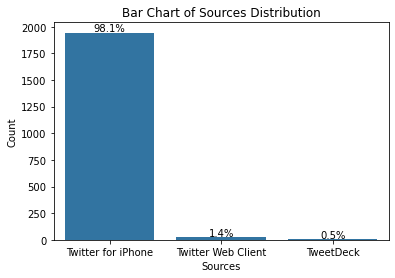

In [96]:
# Creating a bar chart to show the most popular sources
create_bar_chart(variable='source', variable_name='Sources')

#### Insight #2: Top Dog Breeds Featured by WeRateDogs

In [98]:
dog_breeds = master_df.most_likely_breed.value_counts()[:10]
dog_breeds

golden_retriever      158
Labrador_retriever    105
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             50
chow                   48
Pomeranian             42
Samoyed                41
malamute               33
Name: most_likely_breed, dtype: int64

In [99]:
dog_breeds.keys()

Index(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'toy_poodle', 'chow', 'Pomeranian', 'Samoyed', 'malamute'],
      dtype='object')

#### Visualization #2

In [128]:
order = master_df.most_likely_breed.value_counts().keys()

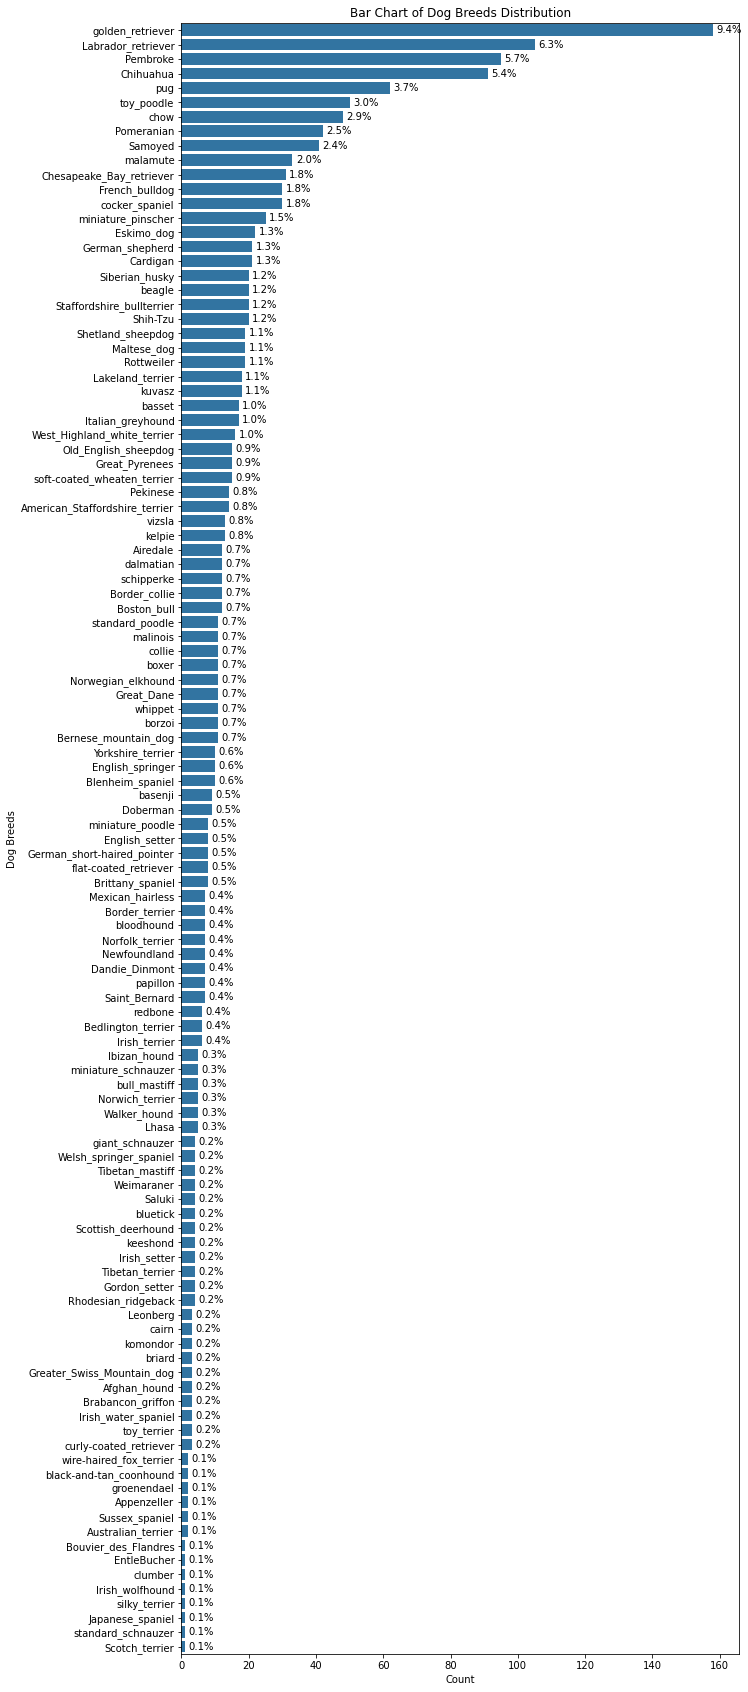

In [143]:
# Creating a bar chart to top dog breeds featured by Weratedogs
plt.figure(figsize=(10, 30))

create_bar_chart(orientation='y', variable='most_likely_breed', variable_name='Dog Breeds', order=order)

The top dog breeds featured by WeRate are golden_retriever, Labrador_retriever, Pembroke, Chihuahua, pug, toy_poodle, chow, Pomeranian, Samoyed, malamute

#### Insight #3: Distribution of calculated rating

Here, I want to visualize how the calculated rating is distributed using an histogram.

In [146]:
# Checking out the summary statistics to choose the best bin size
master_df.calculated_rating.describe()

count    1982.000000
mean        1.170577
std         4.079183
min         0.100000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: calculated_rating, dtype: float64

177.6 is quite large. Let's check that out further.

In [147]:
master_df[master_df.calculated_rating > 1.2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,calculated_rating,most_likely_breed,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,1.3,NaN,6979,33728
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,1.3,Chihuahua,5280,29255
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN,1.3,Labrador_retriever,7198,36823
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN,NaN,1.3,Chesapeake_Bay_retriever,2590,17757
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN,NaN,1.3,Appenzeller,1649,10340
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN,NaN,1.3,Pomeranian,15695,56701
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN,NaN,1.3,Irish_terrier,3605,24455
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,doggo,1.4,Pembroke,6081,27878
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,NaN,NaN,NaN,NaN,1.3,Samoyed,6120,26973
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53,Twitter for iPhone,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN,NaN,NaN,NaN,NaN,1.3,French_bulldog,4145,24506


In [148]:
master_df[master_df.calculated_rating > 1.3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,calculated_rating,most_likely_breed,retweet_count,favorite_count
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,doggo,1.400000,Pembroke,6081,27878
21,887517139158093824,NaN,NaN,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,NaN,NaN,NaN,NaN,NaN,1.400000,NaN,9820,40607
36,884441805382717440,NaN,NaN,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,10,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,Pembroke,4779,23802
49,881536004380872706,NaN,NaN,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,NaN,NaN,NaN,pupper,NaN,pupper,1.400000,Samoyed,13357,43329
64,878057613040115712,NaN,NaN,2017-06-23 01:10:23,Twitter for iPhone,This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN,NaN,1.400000,French_bulldog,5716,37050
94,870063196459192321,NaN,NaN,2017-05-31 23:43:25,Twitter for iPhone,Meet Clifford. He's quite large. Also red. Goo...,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,NaN,NaN,NaN,NaN,NaN,1.400000,NaN,7053,32337
99,868880397819494401,NaN,NaN,2017-05-28 17:23:24,Twitter for iPhone,This is Walter. He won't start hydrotherapy wi...,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN,NaN,NaN,NaN,NaN,1.400000,French_bulldog,12212,57809
112,864873206498414592,NaN,NaN,2017-05-17 16:00:15,Twitter for iPhone,We only rate dogs. Please don't send in Jesus....,https://twitter.com/dog_rates/status/864873206...,14,10,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,NaN,7481,28784
118,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53,Twitter for iPhone,Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14,10,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,Lakeland_terrier,950,7881
130,860184849394610176,NaN,NaN,2017-05-04 17:30:24,Twitter for iPhone,Here we have perhaps the wisest dog of all. Ab...,https://twitter.com/dog_rates/status/860184849...,14,10,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,NaN,5109,14977


So, after taking a closer look, the dog was rated with the year of US independence and since that's part of what makes WeRateDogs special. It's okay.

#### Visualization #3: Distribution of calculated rating

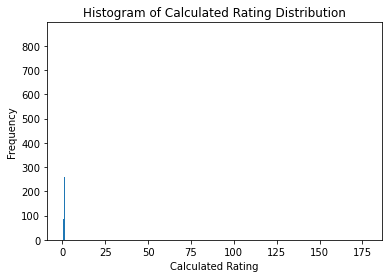

In [145]:
# Creating an histogram to show the calculated rating distribution
create_hist(variable='calculated_rating', variable_name='Calculated Rating', bin_size=0.1)

I'll have to add an xlim to this so that we can ignore the outlier.

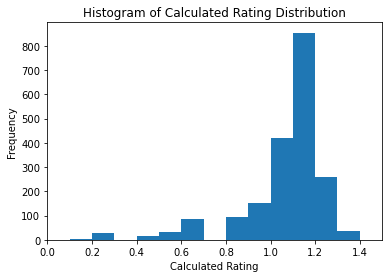

In [151]:
create_hist(variable='calculated_rating', variable_name='Calculated Rating', bin_size=0.1)
plt.xlim(0, 1.5); #since most of the data falls within 1.5

#### Insight #4: Distribution of favorite count

In [152]:
# Checking out the summary stats to pick the best bin
master_df.favorite_count.describe()

count      1982.000000
mean       7686.266902
std       11347.240584
min          66.000000
25%        1627.250000
50%        3449.500000
75%        9526.250000
max      144401.000000
Name: favorite_count, dtype: float64

#### Visualization #4: Distribution of favorite count

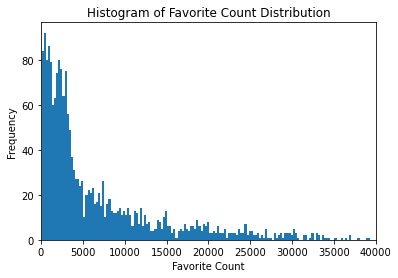

In [165]:
# Creating an histogram to show the favorite count distribution
create_hist(variable='favorite_count', variable_name='Favorite Count', bin_size=250)
plt.xlim(0, 40000);

#### Insight #5: Distribution of Retweet Count

In [166]:
# Checking out the summary stats to pick the best bin size
master_df.retweet_count.describe()

count     1982.000000
mean      2236.331988
std       4006.935669
min         11.000000
25%        493.250000
50%       1077.000000
75%       2547.250000
max      70427.000000
Name: retweet_count, dtype: float64

#### Visualization #5: Distribution of Retweet Count

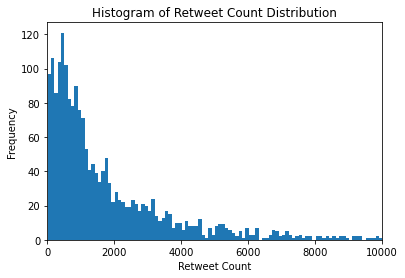

In [174]:
# Creating an histogram to show the calculated rating distribution
create_hist(variable='retweet_count', variable_name='Retweet Count', bin_size=100)
plt.xlim(0, 10000);

#### Insight #6: Favorite count over time

So, we have to do some wrangling to get the month and year for the time series.

In [196]:
master_df['year'] = pd.DatetimeIndex(master_df['timestamp']).year
master_df['month'] = pd.DatetimeIndex(master_df['timestamp']).month

In [198]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 1981
Data columns (total 21 columns):
tweet_id                 1982 non-null object
in_reply_to_status_id    1982 non-null object
in_reply_to_user_id      1982 non-null object
timestamp                1982 non-null datetime64[ns]
source                   1982 non-null object
text                     1982 non-null object
expanded_urls            1982 non-null object
rating_numerator         1982 non-null int64
rating_denominator       1982 non-null int64
name                     1378 non-null object
doggo                    72 non-null object
floofer                  8 non-null object
pupper                   211 non-null object
puppo                    23 non-null object
stage                    304 non-null object
calculated_rating        1982 non-null float64
most_likely_breed        1676 non-null object
retweet_count            1982 non-null int64
favorite_count           1982 non-null int64
year                   

In [199]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,floofer,pupper,puppo,stage,calculated_rating,most_likely_breed,retweet_count,favorite_count,year,month
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,NaN,NaN,NaN,NaN,1.3,NaN,6979,33728,2017,8
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,NaN,NaN,NaN,NaN,1.3,Chihuahua,5280,29255,2017,8
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,NaN,NaN,NaN,NaN,1.2,Chihuahua,3466,21987,2017,7
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,NaN,NaN,NaN,NaN,1.3,Labrador_retriever,7198,36823,2017,7
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,NaN,NaN,NaN,NaN,1.2,basset,7723,35207,2017,7


In [200]:
# Converting both columns to strings
id_list = ['month', 'year']
for i in id_list:
    master_df[i] = master_df[i].astype(str)

Now, what's next is to convert the number in the months to the actual month names.

In [ ]:
# Checking out the first 10 rows to compare with after the replacement
master_df['month'].head(10)

January, February, march, April, May, June, July, August, September, October, November and December.

In [201]:
# Creating a dictionary for the replacement
my_dict = {'12':'December', '11':'November', '10':'October', '9':'September', '8':'August', '7':'July', '6':'June', '5':'May', '4':'April', '3':'March', '2':'February', '1':'January'}
for i, j in my_dict.items():
    master_df['month'] = master_df['month'].str.replace(i, j)
master_df['month'].head(10)

0    August
1    August
2      July
3      July
4      July
5      July
6      July
7      July
8      July
9      July
Name: month, dtype: object

Now, I'll be concatenating the two columns into a new column.

In [207]:
master_df['month_year'] = None 
# Adding all the values from the two columns together, and then drop the "None" after that.
master_df['month_year'] = master_df.month + ' ' + master_df.year

In [208]:
master_df.month_year.head()

0    August 2017
1    August 2017
2      July 2017
3      July 2017
4      July 2017
Name: month_year, dtype: object

In [209]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,pupper,puppo,stage,calculated_rating,most_likely_breed,retweet_count,favorite_count,year,month,month_year
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,NaN,NaN,NaN,1.3,NaN,6979,33728,2017,August,August 2017
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,NaN,NaN,NaN,1.3,Chihuahua,5280,29255,2017,August,August 2017
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,NaN,NaN,NaN,1.2,Chihuahua,3466,21987,2017,July,July 2017
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,NaN,NaN,NaN,1.3,Labrador_retriever,7198,36823,2017,July,July 2017
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,NaN,NaN,NaN,1.2,basset,7723,35207,2017,July,July 2017


In [210]:
# Now, let's check out the value counts of the new column we created
master_df.month_year.value_counts()

December 2015     366
November 2015     296
January 2016      169
March 2016        120
February 2016     110
July 2016          87
June 2016          80
January 2017       66
October 2016       64
September 2016     62
February 2017      62
August 2016        58
May 2016           57
April 2016         54
December 2016      54
November 2016      53
July 2017          49
March 2017         46
May 2017           43
June 2017          43
April 2017         41
August 2017         2
Name: month_year, dtype: int64

This shows that our data spans from November 2015 to August 2017

Now, we can make our visualization

#### Visualization #6: Favorite count over time

In [223]:
order_list = ['August 2017', 'July 2017', 'June 2017', 'May 2017', 'April 2017', 'March 2017', 'February 2017', 'January 2017', 'December 2016', 'November 2016', 'October 2016', 'September 2016', 'August 2016', 'July 2016', 'June 2016', 'May 2016', 'April 2016', 'March 2016', 'February 2016', 'January 2016', 'December 2015', 'November 2015']
order_list.reverse()
print(order_list)

['November 2015', 'December 2015', 'January 2016', 'February 2016', 'March 2016', 'April 2016', 'May 2016', 'June 2016', 'July 2016', 'August 2016', 'September 2016', 'October 2016', 'November 2016', 'December 2016', 'January 2017', 'February 2017', 'March 2017', 'April 2017', 'May 2017', 'June 2017', 'July 2017', 'August 2017']


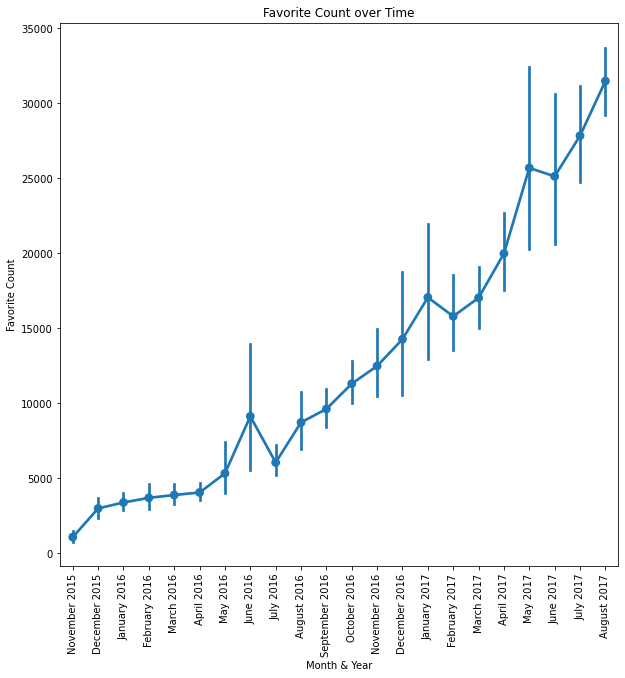

In [236]:
plt.figure(figsize=(10, 10))
ax = sb.pointplot(data = master_df, x = 'month_year', y = 'favorite_count', order=order_list)
plt.xlabel('Month & Year')
plt.ylabel('Favorite Count')
plt.title('Favorite Count over Time')
plt.xticks(rotation = 90);

#### Insight #7: Retweet count over time

#### Visualization #7: Retweet count over time

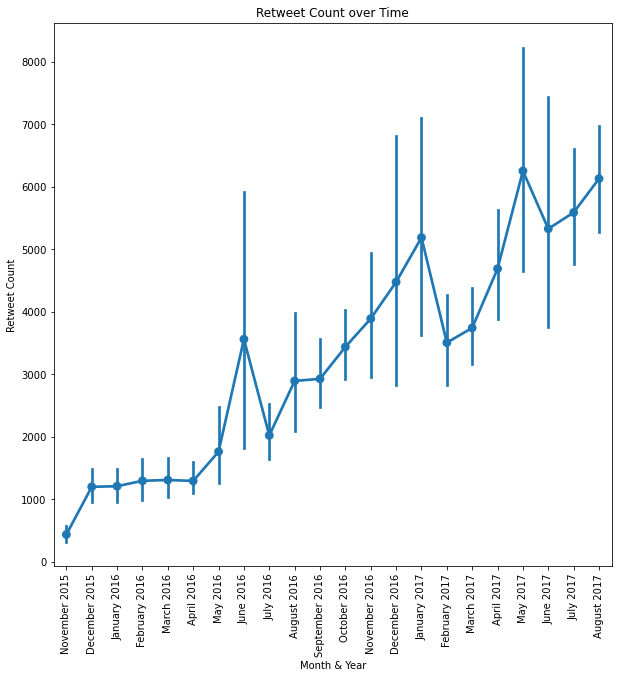

In [234]:
plt.figure(figsize=(10, 10))
ax = sb.pointplot(data = master_df, x = 'month_year', y = 'retweet_count', order=order_list)
plt.xlabel('Month & Year')
plt.ylabel('Retweet Count')
plt.title('Retweet Count over Time')
plt.xticks(rotation = 90);

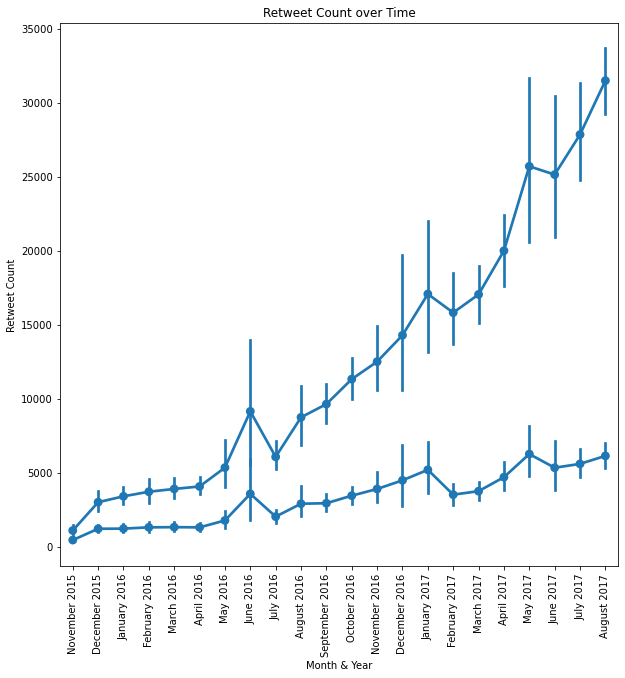

In [242]:
# Plotting the two variables on one plot
plt.figure(figsize=(10, 10))
ax1 = sb.pointplot(data = master_df, x = 'month_year', y = 'retweet_count', order=order_list)
ax2 = sb.pointplot(data = master_df, x = 'month_year', y = 'favorite_count', order=order_list)
plt.xlabel('Month & Year')
plt.ylabel('Retweet Count')
plt.title('Retweet Count over Time')
plt.xticks(rotation = 90);

In [ ]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'cat_var2', size = 5)
g.map(mean_poly, "num_var1", "num_var2", bins = bin_edges)
g.set_ylabels('mean(num_var2)')
g.add_legend()

#### Insight #8: Relationship between retweet count and favorite count

First, let's check out the correlation betwen the 3 variables using plot matrix and a heat map

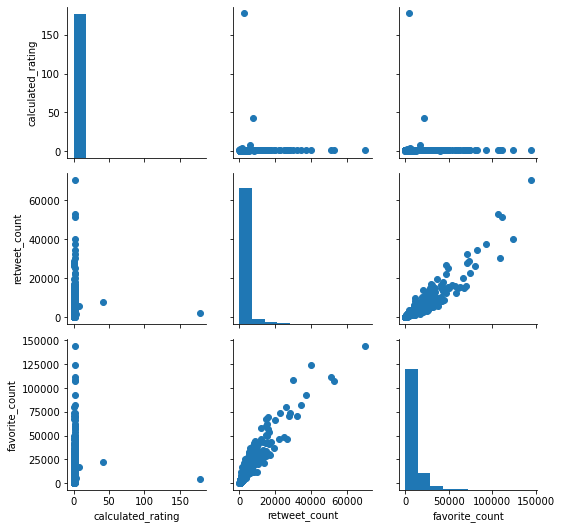

In [178]:
g = sb.PairGrid(data = master_df, vars = ['calculated_rating', 'retweet_count', 'favorite_count'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [181]:
# Creating a dataframe for the columns I'm interested in
interest_df = master_df[['calculated_rating', 'retweet_count', 'favorite_count']]

<AxesSubplot:>

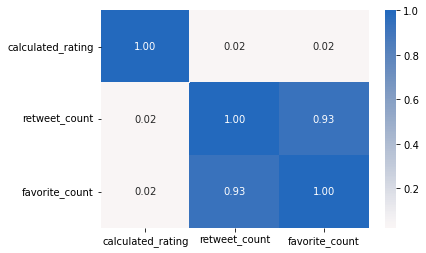

In [182]:
# Creating heat map to show correlation
sb.heatmap(interest_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

From the above visualizations, only the retweet count and favorite count have a strong correlation. Both variables have little to no correlation with the calculated rating.

#### Visualization #8: Relationship between retweet count and favorite count

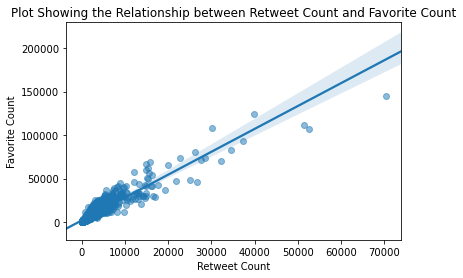

In [187]:
create_scatter(x='retweet_count', x_name='Retweet Count', y='favorite_count', y_name='Favorite Count', alpha=0.5)

<a id="conclusions"></a>
## Conclusions